In [1]:
#Lets first import all the nessessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [2]:
#Lets read the data in
df1=pd.read_csv ("LT_Processed_without_Outliers_Latest.csv")

In [3]:
df1.head()

,DeploymentSeverity,NumberOfRacks,NumberOfServers,SKU Avaliable Flag,CT Signal to LIve,CT Signal to Dock,NewDCFlag_True,ColoReady At PlanReservationStart Flag_Yes,ColoReady At PlanReservationStart Flag_missing,EngineeringGroup_O365 Exchange,EngineeringGroup_Rare_var,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Xbox,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM VMWare Comp,PlanResourceTypeName_BackEnd,PlanResourceTypeName_Compute,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_HPC,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Rare_var,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,IsAddRack_Yes,IsAddRack_missing,IsFirstFootprint_True,IsNPI_True,PlanGEO_Asia Pacific,PlanGEO_CANADA,PlanGEO_CHINA,PlanGEO_Canary (US),PlanGEO_Europe,PlanGEO_FRANCE,PlanGEO_INDIA,PlanGEO_JAPAN,PlanGEO_Korea,PlanGEO_Rare_var,PlanGEO_USGov,PlanGEO_United Kingdom,PlanGEO_United States,PlanIntentName_Growth,PlanIntentName_Pilot,PlanIntentName_Rare_var,PlanIntentName_Reservation,PlanIntentName_Secondary,PlanIntentName_Test-Prod,PlanOrderPriorityName_63-N3 NPI,PlanOrderPriorityName_99-ZZ No Priority,PlanOrderPriorityName_Rare_var,Region_Australia Southeast,Region_Canada Central,Region_Central US,Region_East Asia,Region_East US,Region_East US 2,Region_Japan East,Region_Japan West,Region_North Central US,Region_North Europe,Region_Rare_var,Region_South Central US,Region_Southeast Asia,Region_UK South,Region_UK West,Region_USGov Virginia,Region_West Central US,Region_West Europe,Region_West US,Region_West US 2,RegionGroup_Rare_var,RegionGroup_Restricted,RegionType_Hub,RegionType_Satellite,PlanPropertyGroupName_Azure Bare Metal NetApp,PlanPropertyGroupName_Azure Compute APAC,PlanPropertyGroupName_Azure Compute EMEA,PlanPropertyGroupName_Azure Compute US,PlanPropertyGroupName_Azure Dedicated HSM,PlanPropertyGroupName_Azure GPU,PlanPropertyGroupName_Azure HPC,PlanPropertyGroupName_Azure Storage APAC,PlanPropertyGroupName_Azure Storage EMEA,PlanPropertyGroupName_Azure Storage US,PlanPropertyGroupName_Azure XIO Storage US,PlanPropertyGroupName_Exchange,PlanPropertyGroupName_Game Streaming Dev,PlanPropertyGroupName_Rare_var,PlanPropertyGroupName_SAP HANA (AZURE),PlanPropertyGroupName_SQLAzure-Prod-SAWA,PlanPropertyGroupName_Search,PlanPropertyGroupName_VMWare Bare Metal PG,SKUCategoryName_Rack,SKUCategoryName_Rare_var
0,0.0,20.0,800.0,0,124.0,31.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,20.0,280.0,0,126.0,42.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,20.0,800.0,0,198.0,31.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,20.0,880.0,0,207.0,49.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0

In [5]:
#lets define our predictors and outcome (Target)
x=df1.drop(["CT Signal to LIve","CT Signal to Dock"],axis=1)
y=df1["CT Signal to LIve"]

In [6]:
#Lets split our data into training and testing sets. random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [7]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=300) #lets keep all the parmeters to default as of now

In [8]:
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [9]:
#Predictions 
pred=RFR.predict(x_test)

In [10]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [11]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [12]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 52.75354083777557
MAE: 37.144339228960725
r_square: 0.5271325402779568


In [13]:
#Lets Check the Feaure Importance 
importances=RFR.feature_importances_

for feature in zip (x.columns, importances):
    print (feature)

('DeploymentSeverity', 0.0891308707227877)
('NumberOfRacks', 0.026140569453617778)
('NumberOfServers', 0.13804948138417203)
('SKU Avaliable Flag', 0.012515622951175047)
('NewDCFlag_True', 0.016532637064097758)
('ColoReady At PlanReservationStart Flag_Yes', 0.010411222768794113)
('ColoReady At PlanReservationStart Flag_missing', 0.010792214887520949)
('EngineeringGroup_O365 Exchange', 0.06395219254534701)
('EngineeringGroup_Rare_var', 0.004671878463322333)
('EngineeringGroup_SAP HANA', 0.0006205886421906138)
('EngineeringGroup_Search', 0.008984082904197064)
('EngineeringGroup_Xbox', 0.0023783261277010278)
('PlanResourceTypeName_BM CRAY GPU', 4.937746288175253e-05)
('PlanResourceTypeName_BM CRAY GPU OPS', 0.00010087625493838868)
('PlanResourceTypeName_BM HSM', 0.0012898652729015116)
('PlanResourceTypeName_BM NetApp', 0.004732729349811449)
('PlanResourceTypeName_BM VMWare Comp', 0.00022764108481228114)
('PlanResourceTypeName_BackEnd', 0.00012295292329608183)
('PlanResourceTypeName_Compute

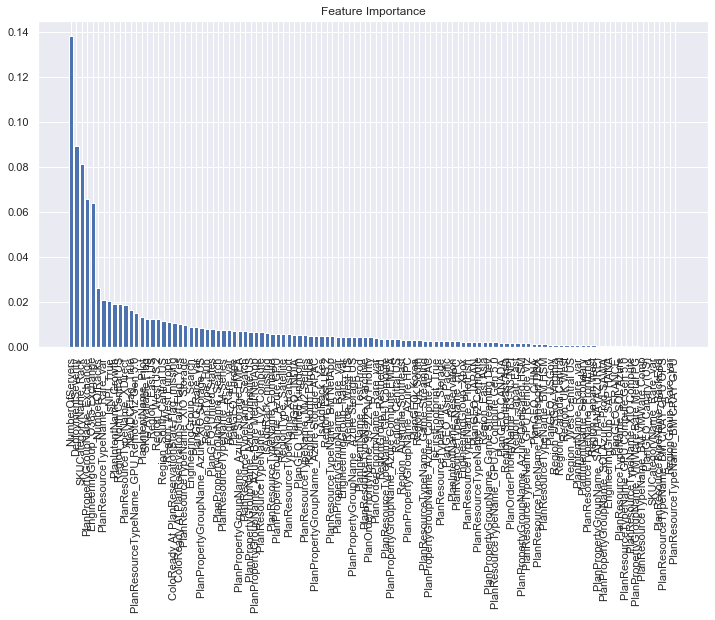

In [14]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [15]:
# We are going to use RandomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [16]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [17]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [19]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RFR, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [20]:
#Fit the data
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=300,
                              

In [26]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [23]:
#GridSearch Predictions
pred1=rf_random.predict(x_test)

In [24]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred1))
MAE = mean_absolute_error(y_test, pred1)
r_squre= r2_score(y_test, pred1)

In [25]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 52.34559339910741
MAE: 37.259281924055834
r_square: 0.5344177078950172


# Gradient Boosting

In [34]:
# Initialize and fit regressor
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()

In [35]:
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
#Predictions
gb_pred=gbr.predict(x_test)

In [37]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, gb_pred))
MAE = mean_absolute_error(y_test, gb_pred)
r_squre= r2_score(y_test, gb_pred)

In [38]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 55.7567602034662
MAE: 41.26697237952986
r_square: 0.47176002860825583


In [39]:
#Hyperparameter Tuning 
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
#Loss function
loss = ['ls', 'lad', 'huber']
#Criteria
criterion =['mse','friedman_mse']

In [40]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               
                'loss':loss,
               'criterion':criterion
              
              }

In [41]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [42]:
gb_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  14.2s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.1s remaining:    0.0s


[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  14.1s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  12.1s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  13.5s
[CV] n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=700, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=  13.4s
[CV] n_estimators=100, max_features=auto, max_depth=4, loss=lad, criterion=friedman_mse 
[CV]  n_estimators=100, max_features=auto, max_depth=4, loss=lad, criterion=friedman_mse, total=   0.7s
[CV] n_estimators=100, max_features=auto, max_depth=4, loss=lad, criterion=friedman_mse 
[CV]  n_estimators=10

[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=   7.9s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=   8.9s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=   7.5s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=   8.1s
[CV] n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse 
[CV]  n_estimators=400, max_features=auto, max_depth=7, loss=huber, criterion=friedman_mse, total=   8.1s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [43]:
gb_random.best_params_

{'n_estimators': 100,
 'max_features': 'sqrt',
 'max_depth': 7,
 'loss': 'huber',
 'criterion': 'friedman_mse'}

In [45]:
#GridSearch Predictions 
gb_pred1=gb_random.predict(x_test)

In [46]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, gb_pred1))
MAE = mean_absolute_error(y_test, gb_pred1)
r_squre= r2_score(y_test, gb_pred1)

In [47]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 54.31490634958445
MAE: 38.4041850931483
r_square: 0.4987270502595097


# AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostRegressor
abr= AdaBoostRegressor()

In [31]:
abr.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [32]:
#Predictions
pred=abr.predict(x_test)

In [33]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [34]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 68.88035509656451
MAE: 55.37207955103475
r_square: 0.2373007598789828


In [82]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

adb1 = AdaBoostRegressor()
parameters = {
                'n_estimators': [100,200,300],
                'learning_rate' : [0.1,1],
                'loss' : ['linear', 'square', 'exponential']
               
}

cv = GridSearchCV(adb1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   19.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                         loss='linear', n_estimators=50,
                                         random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [83]:
cv.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

# Neural Neats-MLP

In [35]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor()

In [36]:
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [37]:
#Predictions
pred=mlp.predict(x_test)

In [38]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [39]:
#Results
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 77.58378507091754
MAE: 62.61416986139014
r_square: 0.03238077988527943


In [89]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

mlp1 = MLPRegressor()
parameters = {
                'hidden_layer_sizes': [(10,), (50,), (100,)],
                'activation': ['relu', 'tanh', 'logistic'],
                'learning_rate': ['constant', 'invscaling', 'adaptive']
               
}

cv = GridSearchCV(mlp1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   30.2s finished
C:\Users\Shrutee\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=...uffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['rel

In [90]:
cv.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'learning_rate': 'invscaling'}

# Catboost 

In [48]:
from catboost import CatBoostRegressor
cr=CatBoostRegressor()

In [49]:
cr.fit(x_train, y_train,eval_set=(x_test, y_test))

Learning rate set to 0.043628
0:	learn: 73.4155311	test: 76.1108880	best: 76.1108880 (0)	total: 108ms	remaining: 1m 48s
1:	learn: 72.3316092	test: 75.2119373	best: 75.2119373 (1)	total: 114ms	remaining: 56.8s
2:	learn: 71.3933894	test: 74.4932083	best: 74.4932083 (2)	total: 120ms	remaining: 39.8s
3:	learn: 70.6810300	test: 73.9183462	best: 73.9183462 (3)	total: 125ms	remaining: 31.2s
4:	learn: 69.9289567	test: 73.3291673	best: 73.3291673 (4)	total: 135ms	remaining: 26.8s
5:	learn: 69.1431036	test: 72.7226708	best: 72.7226708 (5)	total: 141ms	remaining: 23.3s
6:	learn: 68.5254746	test: 72.2744306	best: 72.2744306 (6)	total: 144ms	remaining: 20.5s
7:	learn: 67.7781380	test: 71.6351899	best: 71.6351899 (7)	total: 148ms	remaining: 18.3s
8:	learn: 67.1594866	test: 71.1971431	best: 71.1971431 (8)	total: 151ms	remaining: 16.6s
9:	learn: 66.6237134	test: 70.7238299	best: 70.7238299 (9)	total: 154ms	remaining: 15.2s
10:	learn: 66.1290955	test: 70.3194832	best: 70.3194832 (10)	total: 157ms	remai

94:	learn: 51.3272817	test: 58.8192125	best: 58.8192125 (94)	total: 428ms	remaining: 4.08s
95:	learn: 51.2470746	test: 58.7605077	best: 58.7605077 (95)	total: 432ms	remaining: 4.07s
96:	learn: 51.1553907	test: 58.7166138	best: 58.7166138 (96)	total: 436ms	remaining: 4.05s
97:	learn: 51.0809196	test: 58.6613573	best: 58.6613573 (97)	total: 439ms	remaining: 4.04s
98:	learn: 50.9587550	test: 58.5674803	best: 58.5674803 (98)	total: 442ms	remaining: 4.02s
99:	learn: 50.8972731	test: 58.5727184	best: 58.5674803 (98)	total: 445ms	remaining: 4s
100:	learn: 50.7820394	test: 58.5233204	best: 58.5233204 (100)	total: 448ms	remaining: 3.99s
101:	learn: 50.6919934	test: 58.4819475	best: 58.4819475 (101)	total: 451ms	remaining: 3.97s
102:	learn: 50.5660104	test: 58.4225940	best: 58.4225940 (102)	total: 455ms	remaining: 3.96s
103:	learn: 50.4687331	test: 58.3569811	best: 58.3569811 (103)	total: 458ms	remaining: 3.94s
104:	learn: 50.3745611	test: 58.3039681	best: 58.3039681 (104)	total: 461ms	remaining

185:	learn: 44.7939686	test: 55.6441375	best: 55.6441375 (185)	total: 746ms	remaining: 3.26s
186:	learn: 44.7378364	test: 55.6361773	best: 55.6361773 (186)	total: 749ms	remaining: 3.26s
187:	learn: 44.6893148	test: 55.6187429	best: 55.6187429 (187)	total: 753ms	remaining: 3.25s
188:	learn: 44.6342767	test: 55.5795306	best: 55.5795306 (188)	total: 756ms	remaining: 3.25s
189:	learn: 44.5908272	test: 55.5439311	best: 55.5439311 (189)	total: 760ms	remaining: 3.24s
190:	learn: 44.5219965	test: 55.4996548	best: 55.4996548 (190)	total: 764ms	remaining: 3.24s
191:	learn: 44.4678040	test: 55.4752495	best: 55.4752495 (191)	total: 768ms	remaining: 3.23s
192:	learn: 44.3737885	test: 55.4287462	best: 55.4287462 (192)	total: 771ms	remaining: 3.22s
193:	learn: 44.2942962	test: 55.3739670	best: 55.3739670 (193)	total: 774ms	remaining: 3.21s
194:	learn: 44.2301266	test: 55.3654894	best: 55.3654894 (194)	total: 777ms	remaining: 3.21s
195:	learn: 44.1905188	test: 55.3443935	best: 55.3443935 (195)	total: 

300:	learn: 38.3611297	test: 53.7695418	best: 53.7628402 (294)	total: 1.22s	remaining: 2.83s
301:	learn: 38.3513514	test: 53.7595333	best: 53.7595333 (301)	total: 1.23s	remaining: 2.83s
302:	learn: 38.2980988	test: 53.7674836	best: 53.7595333 (301)	total: 1.23s	remaining: 2.83s
303:	learn: 38.2625015	test: 53.7611109	best: 53.7595333 (301)	total: 1.24s	remaining: 2.83s
304:	learn: 38.2162633	test: 53.7596390	best: 53.7595333 (301)	total: 1.24s	remaining: 2.83s
305:	learn: 38.1525693	test: 53.7537949	best: 53.7537949 (305)	total: 1.24s	remaining: 2.82s
306:	learn: 38.1320318	test: 53.7368627	best: 53.7368627 (306)	total: 1.25s	remaining: 2.82s
307:	learn: 38.0875643	test: 53.7357174	best: 53.7357174 (307)	total: 1.25s	remaining: 2.82s
308:	learn: 38.0421124	test: 53.7096194	best: 53.7096194 (308)	total: 1.26s	remaining: 2.81s
309:	learn: 37.9903480	test: 53.7137722	best: 53.7096194 (308)	total: 1.26s	remaining: 2.81s
310:	learn: 37.9246443	test: 53.6890561	best: 53.6890561 (310)	total: 

399:	learn: 34.2822245	test: 53.3865732	best: 53.3845101 (398)	total: 1.69s	remaining: 2.53s
400:	learn: 34.2514867	test: 53.3879828	best: 53.3845101 (398)	total: 1.7s	remaining: 2.53s
401:	learn: 34.2073811	test: 53.3974656	best: 53.3845101 (398)	total: 1.7s	remaining: 2.53s
402:	learn: 34.1649043	test: 53.4005735	best: 53.3845101 (398)	total: 1.71s	remaining: 2.52s
403:	learn: 34.1218521	test: 53.3923148	best: 53.3845101 (398)	total: 1.71s	remaining: 2.52s
404:	learn: 34.1022951	test: 53.3816421	best: 53.3816421 (404)	total: 1.72s	remaining: 2.52s
405:	learn: 34.0609701	test: 53.3666283	best: 53.3666283 (405)	total: 1.72s	remaining: 2.52s
406:	learn: 34.0192166	test: 53.3463856	best: 53.3463856 (406)	total: 1.73s	remaining: 2.52s
407:	learn: 34.0111233	test: 53.3376980	best: 53.3376980 (407)	total: 1.73s	remaining: 2.52s
408:	learn: 33.9835087	test: 53.3262000	best: 53.3262000 (408)	total: 1.75s	remaining: 2.52s
409:	learn: 33.9412756	test: 53.3127350	best: 53.3127350 (409)	total: 1.

494:	learn: 31.2541595	test: 53.1837462	best: 53.1410867 (471)	total: 2.17s	remaining: 2.21s
495:	learn: 31.2322189	test: 53.1989140	best: 53.1410867 (471)	total: 2.17s	remaining: 2.2s
496:	learn: 31.1946290	test: 53.1793665	best: 53.1410867 (471)	total: 2.17s	remaining: 2.2s
497:	learn: 31.1709390	test: 53.1937285	best: 53.1410867 (471)	total: 2.18s	remaining: 2.19s
498:	learn: 31.1505104	test: 53.2037638	best: 53.1410867 (471)	total: 2.18s	remaining: 2.19s
499:	learn: 31.1133246	test: 53.2076122	best: 53.1410867 (471)	total: 2.19s	remaining: 2.19s
500:	learn: 31.0813341	test: 53.2094591	best: 53.1410867 (471)	total: 2.19s	remaining: 2.18s
501:	learn: 31.0487571	test: 53.2114399	best: 53.1410867 (471)	total: 2.19s	remaining: 2.18s
502:	learn: 31.0144916	test: 53.2335983	best: 53.1410867 (471)	total: 2.2s	remaining: 2.17s
503:	learn: 30.9907893	test: 53.2541108	best: 53.1410867 (471)	total: 2.2s	remaining: 2.17s
504:	learn: 30.9714839	test: 53.2572607	best: 53.1410867 (471)	total: 2.21

596:	learn: 28.7585095	test: 53.2236844	best: 53.1410867 (471)	total: 2.64s	remaining: 1.78s
597:	learn: 28.7508068	test: 53.2293643	best: 53.1410867 (471)	total: 2.64s	remaining: 1.78s
598:	learn: 28.7353587	test: 53.2128308	best: 53.1410867 (471)	total: 2.65s	remaining: 1.77s
599:	learn: 28.7137121	test: 53.2235003	best: 53.1410867 (471)	total: 2.65s	remaining: 1.77s
600:	learn: 28.6783859	test: 53.2231036	best: 53.1410867 (471)	total: 2.66s	remaining: 1.76s
601:	learn: 28.6553836	test: 53.2309130	best: 53.1410867 (471)	total: 2.66s	remaining: 1.76s
602:	learn: 28.6312322	test: 53.2129176	best: 53.1410867 (471)	total: 2.67s	remaining: 1.76s
603:	learn: 28.6133277	test: 53.1952060	best: 53.1410867 (471)	total: 2.67s	remaining: 1.75s
604:	learn: 28.5900313	test: 53.1904373	best: 53.1410867 (471)	total: 2.68s	remaining: 1.75s
605:	learn: 28.5760837	test: 53.1915849	best: 53.1410867 (471)	total: 2.68s	remaining: 1.75s
606:	learn: 28.5458898	test: 53.1975196	best: 53.1410867 (471)	total: 

698:	learn: 26.9145065	test: 53.0596907	best: 53.0479876 (696)	total: 3.11s	remaining: 1.34s
699:	learn: 26.8988817	test: 53.0635085	best: 53.0479876 (696)	total: 3.12s	remaining: 1.33s
700:	learn: 26.8821391	test: 53.0639971	best: 53.0479876 (696)	total: 3.12s	remaining: 1.33s
701:	learn: 26.8660004	test: 53.0604685	best: 53.0479876 (696)	total: 3.12s	remaining: 1.33s
702:	learn: 26.8563587	test: 53.0601061	best: 53.0479876 (696)	total: 3.13s	remaining: 1.32s
703:	learn: 26.8399465	test: 53.0593803	best: 53.0479876 (696)	total: 3.13s	remaining: 1.32s
704:	learn: 26.8270285	test: 53.0563886	best: 53.0479876 (696)	total: 3.13s	remaining: 1.31s
705:	learn: 26.8072364	test: 53.0619202	best: 53.0479876 (696)	total: 3.14s	remaining: 1.31s
706:	learn: 26.7896333	test: 53.0566334	best: 53.0479876 (696)	total: 3.14s	remaining: 1.3s
707:	learn: 26.7757977	test: 53.0588829	best: 53.0479876 (696)	total: 3.14s	remaining: 1.3s
708:	learn: 26.7704960	test: 53.0488078	best: 53.0479876 (696)	total: 3.

812:	learn: 25.0520994	test: 53.0373152	best: 53.0231934 (732)	total: 3.59s	remaining: 825ms
813:	learn: 25.0385011	test: 53.0383040	best: 53.0231934 (732)	total: 3.59s	remaining: 820ms
814:	learn: 25.0264798	test: 53.0371404	best: 53.0231934 (732)	total: 3.59s	remaining: 816ms
815:	learn: 25.0210355	test: 53.0356176	best: 53.0231934 (732)	total: 3.6s	remaining: 812ms
816:	learn: 24.9997362	test: 53.0237592	best: 53.0231934 (732)	total: 3.6s	remaining: 808ms
817:	learn: 24.9916306	test: 53.0162283	best: 53.0162283 (817)	total: 3.61s	remaining: 803ms
818:	learn: 24.9716937	test: 53.0187973	best: 53.0162283 (817)	total: 3.61s	remaining: 799ms
819:	learn: 24.9451159	test: 53.0145861	best: 53.0145861 (819)	total: 3.62s	remaining: 794ms
820:	learn: 24.9373184	test: 53.0133465	best: 53.0133465 (820)	total: 3.62s	remaining: 790ms
821:	learn: 24.9236088	test: 53.0045081	best: 53.0045081 (821)	total: 3.63s	remaining: 786ms
822:	learn: 24.9146354	test: 53.0053158	best: 53.0045081 (821)	total: 3.

929:	learn: 23.4841761	test: 52.9723316	best: 52.9567816 (919)	total: 4.06s	remaining: 306ms
930:	learn: 23.4715234	test: 52.9817698	best: 52.9567816 (919)	total: 4.06s	remaining: 301ms
931:	learn: 23.4518506	test: 52.9956286	best: 52.9567816 (919)	total: 4.07s	remaining: 297ms
932:	learn: 23.4458394	test: 52.9966881	best: 52.9567816 (919)	total: 4.07s	remaining: 292ms
933:	learn: 23.4413443	test: 52.9909681	best: 52.9567816 (919)	total: 4.08s	remaining: 288ms
934:	learn: 23.4258468	test: 52.9892505	best: 52.9567816 (919)	total: 4.08s	remaining: 284ms
935:	learn: 23.4092849	test: 52.9903590	best: 52.9567816 (919)	total: 4.08s	remaining: 279ms
936:	learn: 23.3997147	test: 52.9911438	best: 52.9567816 (919)	total: 4.09s	remaining: 275ms
937:	learn: 23.3794261	test: 52.9870578	best: 52.9567816 (919)	total: 4.09s	remaining: 270ms
938:	learn: 23.3703830	test: 52.9856071	best: 52.9567816 (919)	total: 4.09s	remaining: 266ms
939:	learn: 23.3566467	test: 52.9940355	best: 52.9567816 (919)	total: 

In [50]:
# Lets do predictions on out test data
cr_pred=cr.predict(x_test)

In [51]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, cr_pred))
MAE = mean_absolute_error(y_test, cr_pred)
r_squre= r2_score(y_test, cr_pred)

In [52]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 52.919084093939986
MAE: 38.30148445230979
r_square: 0.5241601201869541


In [53]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

cat1 = CatBoostRegressor()
parameters = {
                'iterations': [100,200,300,400],
                'loss_function': ['MAE', 'RMSE'],
                
               
}

cv = GridSearchCV(cat1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   25.2s finished


Learning rate set to 0.074386
0:	learn: 72.7158061	total: 3.27ms	remaining: 1.3s
1:	learn: 70.9524091	total: 7.13ms	remaining: 1.42s
2:	learn: 69.5052716	total: 12ms	remaining: 1.59s
3:	learn: 68.4494573	total: 16ms	remaining: 1.58s
4:	learn: 67.3858512	total: 20.1ms	remaining: 1.59s
5:	learn: 66.2947912	total: 23.4ms	remaining: 1.53s
6:	learn: 65.2586954	total: 26.8ms	remaining: 1.5s
7:	learn: 64.3032365	total: 30.5ms	remaining: 1.49s
8:	learn: 63.5251490	total: 33.9ms	remaining: 1.47s
9:	learn: 62.8808611	total: 37.4ms	remaining: 1.46s
10:	learn: 62.3303443	total: 40.8ms	remaining: 1.44s
11:	learn: 61.6333139	total: 44.4ms	remaining: 1.44s
12:	learn: 61.0664065	total: 47.8ms	remaining: 1.42s
13:	learn: 60.5935437	total: 51.1ms	remaining: 1.41s
14:	learn: 60.2030325	total: 54.3ms	remaining: 1.39s
15:	learn: 59.7644921	total: 57.8ms	remaining: 1.39s
16:	learn: 59.4317391	total: 61.3ms	remaining: 1.38s
17:	learn: 58.9621629	total: 65ms	remaining: 1.38s
18:	learn: 58.6006061	total: 68.5m

163:	learn: 39.3688071	total: 627ms	remaining: 902ms
164:	learn: 39.2472088	total: 631ms	remaining: 898ms
165:	learn: 39.1682203	total: 634ms	remaining: 894ms
166:	learn: 39.0935937	total: 638ms	remaining: 890ms
167:	learn: 38.9977877	total: 641ms	remaining: 886ms
168:	learn: 38.9176921	total: 645ms	remaining: 881ms
169:	learn: 38.8340863	total: 648ms	remaining: 877ms
170:	learn: 38.7545782	total: 652ms	remaining: 873ms
171:	learn: 38.7059267	total: 655ms	remaining: 869ms
172:	learn: 38.6415838	total: 659ms	remaining: 865ms
173:	learn: 38.5680580	total: 663ms	remaining: 861ms
174:	learn: 38.5155805	total: 666ms	remaining: 856ms
175:	learn: 38.4292307	total: 669ms	remaining: 852ms
176:	learn: 38.3546775	total: 673ms	remaining: 847ms
177:	learn: 38.2251598	total: 677ms	remaining: 844ms
178:	learn: 38.1318289	total: 682ms	remaining: 842ms
179:	learn: 38.0711521	total: 686ms	remaining: 838ms
180:	learn: 37.9655753	total: 690ms	remaining: 834ms
181:	learn: 37.9147624	total: 693ms	remaining:

358:	learn: 28.5540911	total: 1.27s	remaining: 145ms
359:	learn: 28.5136570	total: 1.27s	remaining: 141ms
360:	learn: 28.4780336	total: 1.27s	remaining: 138ms
361:	learn: 28.4426217	total: 1.28s	remaining: 134ms
362:	learn: 28.4125220	total: 1.28s	remaining: 131ms
363:	learn: 28.3822410	total: 1.28s	remaining: 127ms
364:	learn: 28.3549758	total: 1.29s	remaining: 123ms
365:	learn: 28.3350419	total: 1.29s	remaining: 120ms
366:	learn: 28.2786127	total: 1.29s	remaining: 116ms
367:	learn: 28.2283985	total: 1.3s	remaining: 113ms
368:	learn: 28.2246915	total: 1.3s	remaining: 109ms
369:	learn: 28.1899188	total: 1.31s	remaining: 106ms
370:	learn: 28.1436516	total: 1.31s	remaining: 102ms
371:	learn: 28.1135094	total: 1.31s	remaining: 98.8ms
372:	learn: 28.1001303	total: 1.32s	remaining: 95.3ms
373:	learn: 28.0707833	total: 1.32s	remaining: 91.7ms
374:	learn: 28.0420350	total: 1.32s	remaining: 88.2ms
375:	learn: 28.0155845	total: 1.33s	remaining: 84.7ms
376:	learn: 27.9832983	total: 1.33s	remaini

GridSearchCV(cv=3, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x000000000F0601D0>,
             iid='deprecated', n_jobs=-1,
             param_grid={'iterations': [100, 200, 300, 400],
                         'loss_function': ['MAE', 'RMSE']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [54]:
cv.best_params_

{'iterations': 400, 'loss_function': 'RMSE'}

In [57]:
pred_cr1=cv.predict(x_test)

In [58]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred_cr1))
MAE = mean_absolute_error(y_test, pred_cr1)
r_squre= r2_score(y_test, pred_cr1)

In [59]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 53.75664624638975
MAE: 38.78961713488274
r_square: 0.5089784739090653


# KNN

In [60]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [61]:
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [62]:
pred=knn.predict(x_test)

In [63]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [64]:
#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

RMSE : 65.19315752563297
MAE: 47.18380062305295
r_square: 0.2778286899831789


In [106]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

knn1 = KNeighborsRegressor()
parameters = {
                'n_neighbors': [5,7,10,12],
                'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
                
               
}

cv = GridSearchCV(knn1, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of  48 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 10, 12]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [107]:
cv.best_params_

{'algorithm': 'auto', 'n_neighbors': 7}

# Stack Model 

Lest stack Two models 1. Gradient Boosting 2. CatBoosting 
And meta estimator- Random Forest 

This is a special method where we first segment the dataset as training and testing portions.Then we use the training set to train multiple regressors(base learners) and obtain their predictions made on the test set. Then we stack the predicted columns vertically which we consider as features while having the actual values of these samples in the last column as targets.Now we have created a new dataset which we give to another Regressor(meta learner) to identify patterns/relationships between predictions and actual values.

# Now Lets concat the 2 prediction datafreames and one Actual data frame
actual=pd.DataFrame(y_test)

actual.to_csv("True.csv",index=0,columns=actual.columns)

G_pred.columns=["Prediction1"]
C_pred.columns=["Prediction2"]

sd=pd.read_csv("priction_join.csv")

sd.info()

#Lets define X and Y
x=sd.drop("CT Signal to LIve",axis=1)
y=sd["CT Signal to LIve"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

stacker= RandomForestRegressor(n_estimators=100,max_depth=5)

stacker.fit(x_train,y_train)

stcker_pred=stacker.predict(x_test)

#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, stcker_pred))
MAE = mean_absolute_error(y_test, stcker_pred)
r_squre= r2_score(y_test, stcker_pred)

#Results 
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre)

#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300,400,500],
    'max_depth' : [2,3,4,5,6,7,8,None]
}

cv = GridSearchCV(rf, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

cv.best_params_